In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

import time

from ast import literal_eval

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator
from mlrose_hiive import SARunner, GARunner, MIMICRunner, RHCRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\jmaal\AppData\Local\Temp\ipykernel_12656\3754018867.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


In [2]:
# helper funcs

def fitness_mean(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].min()
        fitness_list.append(fitness)
    return np.mean(fitness_list)

def fitness_var(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].min()
        fitness_list.append(fitness)
    return np.var(fitness_list)

def fitness_std(runs_arr):
    # extract fitness values
    fitness_list = []
    for run in runs_arr:
        fitness = run['Fitness'].min()
        fitness_list.append(fitness)
    return np.std(fitness_list)

def feval_mean(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.mean(feval_list)

def feval_var(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.var(feval_list)

def feval_std(runs_arr):
    # extract fitness values
    feval_list = []
    for run in runs_arr:
        feval = run['FEvals'].max()
        feval_list.append(feval)
    return np.std(feval_list)


def time_mean(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.mean(time_list)

def time_var(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.var(time_list)

def time_std(runs_arr):
    # extract fitness values
    time_list = []
    for run in runs_arr:
        time = run['Time'].max()
        time_list.append(time)
    return np.std(time_list)

# given an array of runs, print mean and var for each size
def print_stats(runs_2d):
    for runs_arr in runs_2d:
        print("***RUN STATS***")
        print("mean fitness:",fitness_mean(runs_arr))
        print("VAR fitness:",fitness_var(runs_arr))
        print("STD fitness:",fitness_std(runs_arr))
        print("mean feval:", feval_mean(runs_arr))
        print("VAR feval:", feval_var(runs_arr))
        print("STD feval:", feval_std(runs_arr))
        print("mean runtime:", time_mean(runs_arr))
        print("var runtime:", time_var(runs_arr))
        print("STD runtime:", time_std(runs_arr))

def sa_params(runs_arr):
    print("***SA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Temp:", run.iloc[0]['Temperature'])

def ga_params(runs_arr):
    print("***GA PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Mutation rate:", run.iloc[0]['Mutation Rate'])
        

def mmc_params(runs_arr):
    print("***MMC PARAMS***")
    for run in runs_arr:
        print("best params")
        print("Population size:", run.iloc[0]['Population Size'])
        print("Keep Percent:", run.iloc[0]['Keep Percent'])

In [3]:
problem_sizes = [8,10,12,14]
problems = []

for size in problem_sizes:
    problem = QueensGenerator().generate(
        seed=np.random.randint(0,1000), 
        size=size)
    problems.append(problem)

In [4]:
# Randomized Hill Climbing
# create a runner class and solve the problem with 5 random seeds
rhc_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        rhc = RHCRunner(problem=problem,
                    experiment_name='max_k_rhc',
                    output_directory=None,
                    seed=np.random.randint(0,1000),
                    iteration_list=2 ** np.arange(14),
                    max_attempts=50,
                    restart_list=[10])   
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = rhc.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].min()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_restarts = best_curve_run['Restarts'].iloc()[0]
        run_stats_best_run = df_run_stats[df_run_stats['Restarts'] == best_restarts]      
        # save run to array
        rhc_runs[i].append(run_stats_best_run)


In [5]:
# Simulated Annealing
# create a runner class and solve the problem with 5 random seeds

sa_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        sa = SARunner(problem=problem,
                  experiment_name='max_k_sa',
                  output_directory=None,
                  seed=np.random.randint(0,1000),
                  iteration_list=2 ** np.arange(14),
                  max_attempts=50,
                  temperature_list=[1000],
                  decay_list=[mlrose_hiive.ExpDecay])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = sa.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].min()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp
        run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]      
        # save run to array
        sa_runs[i].append(run_stats_best_run)


In [6]:
HTML(sa_runs[0][0].to_html())

,Iteration,Fitness,FEvals,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters
0,0,4.0,0,0.000337,"[2, 6, 6, 1, 0, 7, 3, 7]",exponential,1000,0.005,0.001,999.998316,1000,8192
1,1,5.0,2,0.002431,"[2, 6, 6, 1, 4, 7, 3, 7]",exponential,1000,0.005,0.001,999.987846,1000,8192
2,2,7.0,4,0.004305,"[2, 7, 6, 1, 4, 7, 3, 7]",exponential,1000,0.005,0.001,999.978477,1000,8192
3,4,11.0,8,0.005693,"[2, 3, 4, 1, 4, 7, 3, 7]",exponential,1000,0.005,0.001,999.971534,1000,8192
4,8,7.0,16,0.007550,"[0, 3, 4, 4, 4, 4, 3, 5]",exponential,1000,0.005,0.001,999.962252,1000,8192
5,16,6.0,32,0.009706,"[0, 2, 4, 2, 4, 0, 3, 1]",exponential,1000,0.005,0.001,999.951472,1000,8192
6,32,6.0,64,0.014334,"[3, 2, 7, 4, 0, 3, 0, 0]",exponential,1000,0.005,0.001,999.928330,1000,8192
7,64,8.0,128,0.022266,"[4, 1, 4, 4, 6, 1, 1, 6]",exponential,1000,0.005,0.001,999.888674,1000,8192
8,128,7.0,256,0.040441,"[6, 3, 3, 3, 7, 3, 5, 5]",exponential,1000,0.005,0.001,999.797816,1000,8192
9,256,6.0,512,0.084701,"[7, 4, 0, 0, 1, 1, 5, 0]",exponential,1000,0.005,0.001,999.576585,1000,8192


In [7]:
print_stats(sa_runs)

***RUN STATS***
mean fitness: 0.6666666666666666
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 3222.3333333333335
VAR feval: 49432.88888888888
STD feval: 222.33508245189034
mean runtime: 0.8119106666660324
var runtime: 0.011599987176085342
STD runtime: 0.1077032366091444
***RUN STATS***
mean fitness: 1.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 3489.0
VAR feval: 136406.0
STD feval: 369.3318291184771
mean runtime: 0.9907749666672316
var runtime: 0.05793183857832107
STD runtime: 0.24069033752587798
***RUN STATS***
mean fitness: 0.6666666666666666
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 3398.3333333333335
VAR feval: 40529.555555555555
STD feval: 201.31953595107345
mean runtime: 1.0631632333340046
var runtime: 0.022995471530582883
STD runtime: 0.15164257822453062
***RUN STATS***
mean fitness: 1.3333333333333333
VAR fitness: 0.888888888888889
STD fitness: 0.9428090415820634
mean feval: 3361.3333333333335
VAR feval: 262

In [8]:
# Genetic Algorithm
# create a runner class and solve the problem with 5 random seeds

ga_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        ga = GARunner(problem=problem,
            experiment_name='max_k_ga',
            output_directory=None, # note: specify an output directory to have results saved to disk
            seed=np.random.randint(0,1000),
            iteration_list=2 ** np.arange(14),
            population_sizes=[200],
            mutation_rates=[0.1])
        
        # the two data frames will contain the results
        df_run_stats, df_run_curves = ga.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].min()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        best_mr = best_curve_run['Mutation Rate'].iloc()[0]
        best_pop_size = best_curve_run['Population Size'].iloc()[0]
        # print(f'Best Mutation Rate: {best_mr}, best Population Size: {best_pop_size}')
        run_stats_best_run = df_run_stats[(df_run_stats['Mutation Rate'] == best_mr) & (df_run_stats['Population Size'] == best_pop_size)]
        
        # save run to array
        ga_runs[i].append(run_stats_best_run)


In [9]:
print_stats(ga_runs)

***RUN STATS***
mean fitness: 0.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 3821.0
VAR feval: 510674.6666666667
STD feval: 714.6150478870891
mean runtime: 0.527803633332951
var runtime: 0.011283967539784065
STD runtime: 0.10622602101078654
***RUN STATS***
mean fitness: 0.6666666666666666
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 73033.33333333333
VAR feval: 2151183829.555556
STD feval: 46380.856283121335
mean runtime: 12.337545133331636
var runtime: 61.077365624666584
STD runtime: 7.815200933096127
***RUN STATS***
mean fitness: 0.6666666666666666
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 74373.66666666667
VAR feval: 1966484572.222222
STD feval: 44345.06254615301
mean runtime: 14.529133500000171
var runtime: 75.04558581064258
STD runtime: 8.662885536046439
***RUN STATS***
mean fitness: 1.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 140638.0
VAR feval: 2124994244.6666667
STD feval: 46097.65986106743
mean runtime

In [10]:
HTML(ga_runs[3][0].to_html())

,Iteration,Fitness,FEvals,Time,State,Population Size,Mutation Rate,max_iters
0,0,10.0,200,0.033088,"[9, 5, 13, 3, 10, 10, 1, 0, 13, 11, 10, 12, 6, 11]",200,0.1,8192
1,1,7.0,402,0.083671,"[3, 11, 10, 3, 9, 12, 1, 12, 8, 0, 4, 0, 13, 6]",200,0.1,8192
2,2,7.0,603,0.163639,"[3, 11, 10, 3, 9, 12, 1, 12, 8, 0, 4, 0, 13, 6]",200,0.1,8192
3,4,6.0,1006,0.238267,"[7, 5, 9, 12, 6, 11, 2, 7, 1, 10, 8, 2, 10, 7]",200,0.1,8192
4,8,4.0,1812,0.500189,"[3, 11, 10, 7, 9, 12, 1, 8, 0, 0, 4, 9, 13, 6]",200,0.1,8192
5,16,3.0,3421,0.822437,"[9, 6, 13, 2, 8, 12, 7, 3, 0, 11, 4, 5, 10, 4]",200,0.1,8192
6,32,2.0,6638,1.487428,"[11, 12, 7, 9, 1, 13, 0, 3, 8, 11, 5, 10, 2, 6]",200,0.1,8192
7,64,1.0,13071,2.913703,"[3, 12, 7, 9, 1, 13, 0, 4, 8, 11, 5, 10, 2, 6]",200,0.1,8192
8,128,1.0,25935,5.585622,"[3, 12, 7, 9, 1, 13, 0, 4, 8, 11, 5, 10, 2, 6]",200,0.1,8192
9,256,1.0,51663,11.202702,"[3, 12, 7, 9, 1, 13, 0, 4, 8, 11, 5, 10, 2, 6]",200,0.1,8192


In [11]:
# MIMIC
# create a runner class and solve the problem with 5 random seeds
mmc_runs = [[] for i in range(len(problems))]

for i in range(len(problems)):
    problem = problems[i]
    for j in range(3):
        # init runner with random seed
        mmc = MIMICRunner(problem=problem,
                      experiment_name='max_k_mmc',
                      output_directory=None,
                      seed=np.random.randint(0,1000),
                      iteration_list=2 ** np.arange(14),
                      population_sizes=[200],
                      max_attempts=50,
                      keep_percent_list=[.5])
                      
    # the two data frames will contain the results
        df_run_stats, df_run_curves = mmc.run()
        # extract best runs in terms of fitness
        best_fitness = df_run_curves['Fitness'].min()
        best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
        # extract min eval out of best fitness runs
        minimum_evaluations = best_runs['FEvals'].min()
        best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]
        
        # id the best params        
        best_keep = best_curve_run['Keep Percent'].iloc()[0]
        best_pop = best_curve_run['Population Size'].iloc()[0]
        run_stats_best_run = df_run_stats[(df_run_stats['Keep Percent'] == best_keep) & 
                                          (df_run_stats['Population Size'] == best_pop) ]      
        # save run to array
        mmc_runs[i].append(run_stats_best_run)


In [12]:
print_stats(mmc_runs)
HTML(mmc_runs[0][0].to_html())

***RUN STATS***
mean fitness: 1.0
VAR fitness: 0.0
STD fitness: 0.0
mean feval: 11190.0
VAR feval: 332722.6666666667
STD feval: 576.8211739063214
mean runtime: 2.5198398333329046
var runtime: 0.01335432015752301
STD runtime: 0.11556089372068308
***RUN STATS***
mean fitness: 1.6666666666666667
VAR fitness: 0.2222222222222222
STD fitness: 0.4714045207910317
mean feval: 11794.0
VAR feval: 8978.666666666666
STD feval: 94.75582655787804
mean runtime: 3.459832066667635
var runtime: 0.032591427796556605
STD runtime: 0.180530960770048
***RUN STATS***
mean fitness: 2.6666666666666665
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 12597.666666666666
VAR feval: 387216.22222222225
STD feval: 622.267002356884
mean runtime: 4.860852533332945
var runtime: 0.05325260516567096
STD runtime: 0.2307652598760718
***RUN STATS***
mean fitness: 3.6666666666666665
VAR fitness: 0.22222222222222224
STD fitness: 0.4714045207910317
mean feval: 11526.333333333334
VAR feval: 333080.2222

,Iteration,Fitness,FEvals,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,9.0,200,0.050573,"[2, 4, 1, 6, 5, 0, 5, 2]",False,200,0.5,8192
1,1,1.0,402,0.132617,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
2,2,1.0,603,0.183555,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
3,4,1.0,1005,0.313515,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
4,8,1.0,1809,0.477608,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
5,16,1.0,3417,0.828709,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
6,32,1.0,6633,1.514886,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
7,64,1.0,10452,2.361384,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
8,128,1.0,10452,2.361384,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192
9,256,1.0,10452,2.361384,"[7.0, 0.0, 4.0, 7.0, 1.0, 6.0, 2.0, 5.0]",False,200,0.5,8192


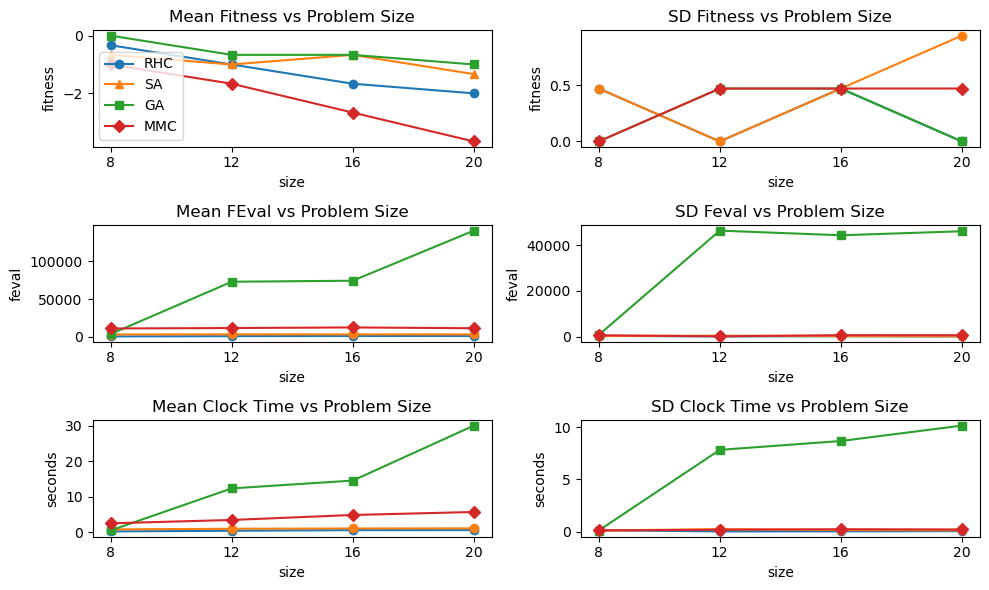

In [35]:
# gather initial plot stats

rhc_meanfit = []
sa_meanfit = []
ga_meanfit = []
mmc_meanfit = []
rhc_sdfit = []
sa_sdfit = []
ga_sdfit = []
mmc_sdfit = []

rhc_meanfev = []
sa_meanfev = []
ga_meanfev = []
mmc_meanfev = []
rhc_sdfev = []
sa_sdfev = []
ga_sdfev = []
mmc_sdfev = []

rhc_meantime = []
sa_meantime = []
ga_meantime = []
mmc_meantime = []
rhc_sdtime = []
sa_sdtime = []
ga_sdtime = []
mmc_sdtime = []

for i in range(len(problems)):
    rhc_meanfit.append(-fitness_mean(rhc_runs[i]))
    sa_meanfit.append(-fitness_mean(sa_runs[i]))
    ga_meanfit.append(-fitness_mean(ga_runs[i]))
    mmc_meanfit.append(-fitness_mean(mmc_runs[i]))
    rhc_sdfit.append(fitness_std(rhc_runs[i]))
    sa_sdfit.append(fitness_std(sa_runs[i]))
    ga_sdfit.append(fitness_std(ga_runs[i]))
    mmc_sdfit.append(fitness_std(mmc_runs[i]))
    
    rhc_meanfev.append(feval_mean(rhc_runs[i]))
    sa_meanfev.append(feval_mean(sa_runs[i]))
    ga_meanfev.append(feval_mean(ga_runs[i]))
    mmc_meanfev.append(feval_mean(mmc_runs[i]))
    rhc_sdfev.append(feval_std(rhc_runs[i]))
    sa_sdfev.append(feval_std(sa_runs[i]))
    ga_sdfev.append(feval_std(ga_runs[i]))
    mmc_sdfev.append(feval_std(mmc_runs[i]))
    
    rhc_meantime.append(time_mean(rhc_runs[i]))
    sa_meantime.append(time_mean(sa_runs[i]))
    ga_meantime.append(time_mean(ga_runs[i]))
    mmc_meantime.append(time_mean(mmc_runs[i]))
    rhc_sdtime.append(time_std(rhc_runs[i]))
    sa_sdtime.append(time_std(sa_runs[i]))
    ga_sdtime.append(time_std(ga_runs[i]))
    mmc_sdtime.append(time_std(mmc_runs[i]))

# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("size")


# fitness mean
axs[0,0].plot(x, rhc_meanfit, label="RHC", marker="o")
axs[0,0].plot(x, sa_meanfit, label="SA",marker="^")
axs[0,0].plot(x, ga_meanfit, label="GA",marker="s")
axs[0,0].plot(x, mmc_meanfit, label="MMC",marker="D")
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel("fitness")

#fitness sd

axs[0,1].plot(x, rhc_sdfit, label="RHC", marker="o")
axs[0,1].plot(x, sa_sdfit, label="SA",marker="o")
axs[0,1].plot(x, ga_sdfit, label="GA",marker="s")
axs[0,1].plot(x, mmc_sdfit, label="MMC",marker="D")
axs[0,1].set_xticks(x)
axs[0,1].set_ylabel("fitness")

#feval mean

axs[1,0].plot(x, rhc_meanfev, label="RHC", marker="o")
axs[1,0].plot(x, sa_meanfev, label="SA",marker="o")
axs[1,0].plot(x, ga_meanfev, label="GA",marker="s")
axs[1,0].plot(x, mmc_meanfev, label="MMC",marker="D")
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel("feval")

# feval sd

axs[1,1].plot(x, rhc_sdfev, label="RHC", marker="o")
axs[1,1].plot(x, sa_sdfev, label="SA",marker="o")
axs[1,1].plot(x, ga_sdfev, label="GA",marker="s")
axs[1,1].plot(x, mmc_sdfev, label="MMC",marker="D")
axs[1,1].set_xticks(x)
axs[1,1].set_ylabel("feval")

#time mean

axs[2,0].plot(x, rhc_meantime, label="RHC", marker="o")
axs[2,0].plot(x, sa_meantime, label="SA",marker="o")
axs[2,0].plot(x, ga_meantime, label="GA",marker="s")
axs[2,0].plot(x, mmc_meantime, label="MMC",marker="D")
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("seconds")

#time sd

axs[2,1].plot(x, rhc_sdtime, label="RHC", marker="o")
axs[2,1].plot(x, sa_sdtime, label="SA",marker="o")
axs[2,1].plot(x, ga_sdtime, label="GA",marker="s")
axs[2,1].plot(x, mmc_sdtime, label="MMC",marker="D")
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("seconds")

axs[0,0].legend(loc="lower left")

plt.tight_layout()
plt.show()

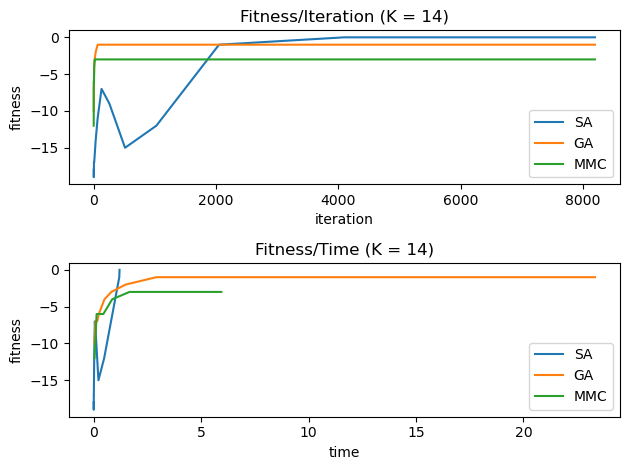

In [31]:
# Group fitness curve


sa_x1 = sa_runs[3][0]["Iteration"].values.tolist()
sa_y1 = [-y for y in sa_runs[3][0]["Fitness"].values.tolist()]
sa_x2 = sa_runs[3][0]["Time"].values.tolist()
sa_y2 = [-y for y in sa_runs[3][0]["Fitness"].values.tolist()]

ga_x1 = ga_runs[3][0]["Iteration"].values.tolist()
ga_y1 = [-y for y in ga_runs[3][0]["Fitness"].values.tolist()]
ga_x2 = ga_runs[3][0]["Time"].values.tolist()
ga_y2 = [-y for y in ga_runs[3][0]["Fitness"].values.tolist()]

mmc_x1 = mmc_runs[3][0]["Iteration"].values.tolist()
mmc_y1 = [-y for y in mmc_runs[3][0]["Fitness"].values.tolist()]
mmc_x2 = mmc_runs[3][0]["Time"].values.tolist()
mmc_y2 = [-y for y in mmc_runs[3][0]["Fitness"].values.tolist()]

fig, ax = plt.subplots(2,1)

ax[0].set_title("Fitness/Iteration (K = 14)")
ax[1].set_title("Fitness/Time (K = 14)")

ax[0].plot(sa_x1, sa_y1, label="SA")  
ax[0].plot(ga_x1, ga_y1, label="GA")  
ax[0].plot(mmc_x1, mmc_y1, label="MMC")
ax[0].set_xlabel("iteration")
ax[0].set_ylabel("fitness")
ax[0].legend(loc="lower right")

ax[1].plot(sa_x2, sa_y2, label="SA") 
ax[1].plot(ga_x2, ga_y2, label="GA")  
ax[1].plot(mmc_x2, mmc_y2, label="MMC")  
ax[1].set_xlabel("time")
ax[1].set_ylabel("fitness")
ax[1].legend(loc="lower right")

fig.tight_layout()

In [15]:
problem_sizes = [8,12,16,20]
problems = []

for size in problem_sizes:
    problem = QueensGenerator().generate(
        seed=np.random.randint(0,1000), 
        size=size)
    problems.append(problem)

In [16]:
# Initial temps

# Indices temp_runs[TEMP][PROBLEM SIZE][RUN NUMBER]

temp_list = [1,100,1000,2000]
temp_runs = [[[] for i in range(len(problems))] for k in range(len(temp_list))]


for i in range(len(temp_list)):
    for j in range(len(problems)):
        problem = problems[j]
        for k in range(3):
            # init runner with random seed
            sa = SARunner(problem=problem,
                      experiment_name='max_k_sa',
                      output_directory=None,
                      seed=np.random.randint(0,1000),
                      iteration_list=2 ** np.arange(15),
                      max_attempts=50,
                      temperature_list=[temp_list[i]],
                      decay_list=[mlrose_hiive.GeomDecay])

            # the two data frames will contain the results
            df_run_stats, df_run_curves = sa.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].min()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

            # id the best params        
            best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp
            run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]      
            # save run to array
            temp_runs[i][j].append(run_stats_best_run)
        
        


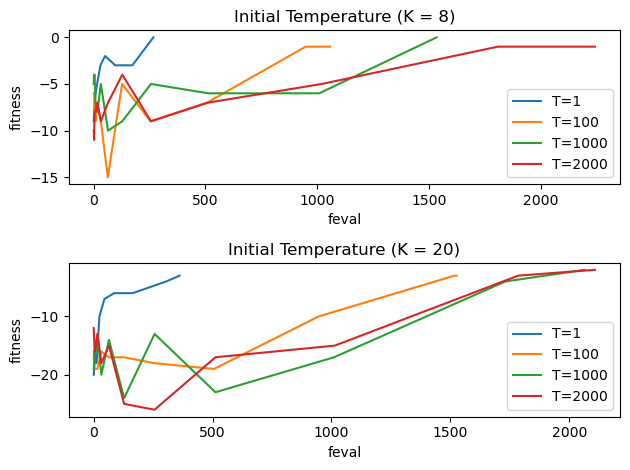

In [32]:
# temp fitness curves

fig, ax = plt.subplots(2,1)  
temp_list = [1,100,1000,2000]
labels = ["T="+str(temp) for temp in temp_list]

for i in range(len(temp_runs)):
    ax[0].plot(
            temp_runs[i][0][0]["FEvals"].values.tolist(),
            [-y for y in temp_runs[i][0][0]["Fitness"].values.tolist()],
            label = labels[i]
           )

for i in range(len(temp_runs)):
    ax[1].plot(temp_runs[i][3][0]["FEvals"].values.tolist(),
            [-y for y in temp_runs[i][3][0]["Fitness"].values.tolist()],
            label = labels[i]
           )

ax[0].legend(loc="lower right")
ax[0].set_xlabel("feval")
ax[0].set_ylabel("fitness")
ax[0].set_title("Initial Temperature (K = 8)")

ax[1].legend(loc="lower right")
ax[1].set_xlabel("feval")
ax[1].set_ylabel("fitness")
ax[1].set_title("Initial Temperature (K = 20)")

fig.tight_layout()


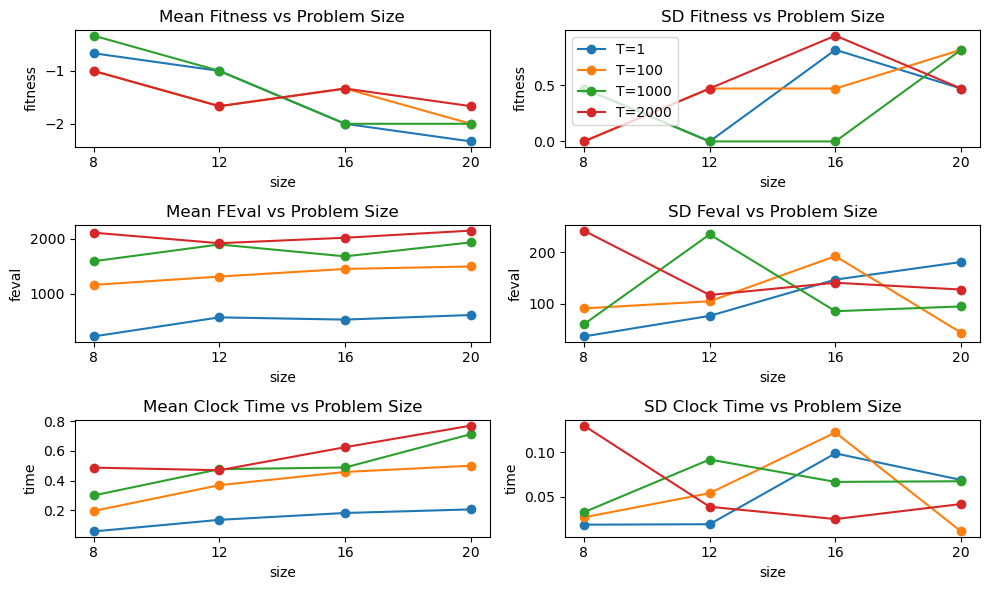

In [36]:
# init temp plots
temp_list = [1,100,1000,2000]
problem_sizes = [8,12,16,20]

axs_list = [axs[0,0],axs[0,1],axs[1,0],axs[1,1],axs[2,0],axs[2,1]]
labels = ["T="+str(temp) for temp in temp_list]


# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("size")


# fitness mean
for i in range(len(temp_list)):
    axs[0,0].plot(problem_sizes,
                  [-fitness_mean(temp_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i],
                 marker="o")
    
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel("fitness")

# fitness std
for i in range(len(temp_list)):
    axs[0,1].plot(problem_sizes,
                  [fitness_std(temp_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[0,1].set_xticks(x)
axs[0,1].set_ylabel("fitness")


# feval mean
for i in range(len(temp_list)):
    axs[1,0].plot(problem_sizes,
                  [feval_mean(temp_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel("feval")

# feval std
for i in range(len(temp_list)):
    axs[1,1].plot(problem_sizes,
                  [feval_std(temp_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,1].set_xticks(x)
axs[1,1].set_ylabel("feval")

# time mean
for i in range(len(temp_list)):
    axs[2,0].plot(problem_sizes,
                  [time_mean(temp_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("time")

# time std
for i in range(len(temp_list)):
    axs[2,1].plot(problem_sizes,
                  [time_std(temp_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("time")

axs[0,1].legend(loc= "upper left")
plt.tight_layout()
plt.show()

In [19]:
# Decay tests

# Indices decay_runs[SCHED][PROBLEM SIZE][RUN NUMBER]

temp_list = [
    mlrose_hiive.GeomDecay(init_temp=100, decay=.99),
    mlrose_hiive.GeomDecay(init_temp=100, decay=.5),
    mlrose_hiive.ExpDecay(init_temp=100, exp_const= 0.005),
    mlrose_hiive.ExpDecay(init_temp=100, exp_const= 0.05)
             ]

decay_runs = [[[] for i in range(len(problems))] for k in range(len(temp_list))]


for i in range(len(temp_list)):
    for j in range(len(problems)):
        problem = problems[j]
        for k in range(3):
            # init runner with random seed
            sa = SARunner(problem=problem,
                      experiment_name='max_k_sa',
                      output_directory=None,
                      seed=np.random.randint(0,1000),
                      iteration_list=2 ** np.arange(15),
                      max_attempts=50,
                      temperature_list=[temp_list[i]]
                      )


            # the two data frames will contain the results
            df_run_stats, df_run_curves = sa.run()
            # extract best runs in terms of fitness
            best_fitness = df_run_curves['Fitness'].min()
            best_runs = df_run_curves[df_run_curves['Fitness'] == best_fitness]
            # extract min eval out of best fitness runs
            minimum_evaluations = best_runs['FEvals'].min()
            best_curve_run = best_runs[best_runs['FEvals'] == minimum_evaluations]

            # id the best params        
            best_init_temperature = best_curve_run['Temperature'].iloc()[0].init_temp
            run_stats_best_run = df_run_stats[df_run_stats['schedule_init_temp'] == best_init_temperature]      
            # save run to array
            decay_runs[i][j].append(run_stats_best_run)
        
        


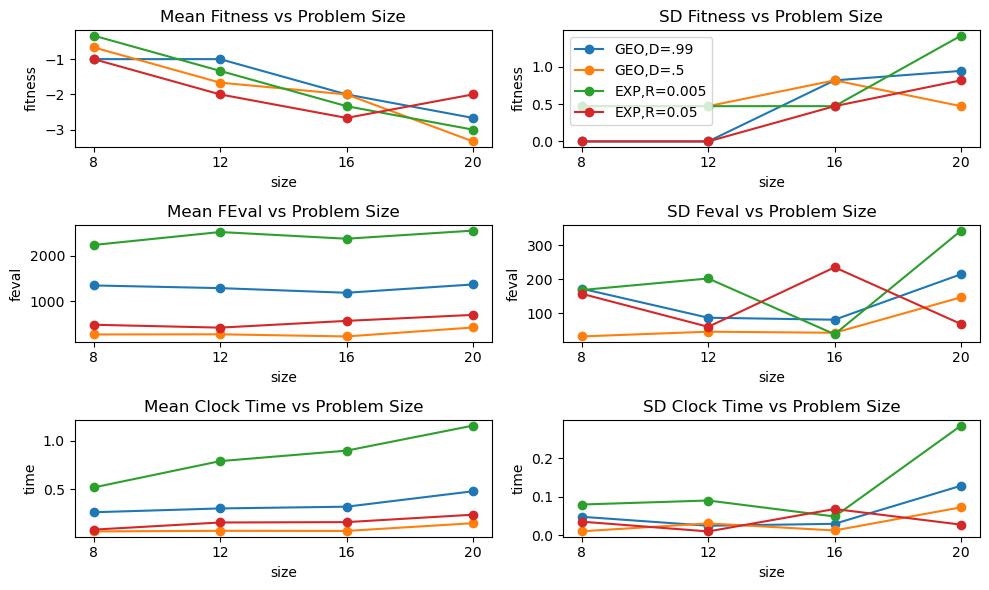

In [40]:
# decay fitness curves

decay_list = ["geo1", "geo2", "exp1", "exp2"]
problem_sizes = [8,12,16,20]

axs_list = [axs[0,0],axs[0,1],axs[1,0],axs[1,1],axs[2,0],axs[2,1]]
labels = ["GEO,D=.99", "GEO,D=.5", "EXP,R=0.005",  "EXP,R=0.05"]


# Mean fitness/ problem size

fig, axs = plt.subplots(3, 2,figsize=(10,6))
axs[0,0].set_title('Mean Fitness vs Problem Size')
axs[0,1].set_title('SD Fitness vs Problem Size')
axs[1,0].set_title('Mean FEval vs Problem Size')
axs[1,1].set_title('SD Feval vs Problem Size')
axs[2,0].set_title('Mean Clock Time vs Problem Size')
axs[2,1].set_title('SD Clock Time vs Problem Size')

x = problem_sizes

for ax in axs.reshape(-1):   
    ax.set_xlabel("size")


# fitness mean
for i in range(len(temp_list)):
    axs[0,0].plot(problem_sizes,
                  [-1*fitness_mean(decay_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i],
                 marker="o")
    
axs[0,0].set_xticks(x)
axs[0,0].set_ylabel("fitness")

# fitness std
for i in range(len(temp_list)):
    axs[0,1].plot(problem_sizes,
                  [fitness_std(decay_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[0,1].set_xticks(x)
axs[0,1].set_ylabel("fitness")


# feval mean
for i in range(len(temp_list)):
    axs[1,0].plot(problem_sizes,
                  [feval_mean(decay_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,0].set_xticks(x)
axs[1,0].set_ylabel("feval")

# feval std
for i in range(len(temp_list)):
    axs[1,1].plot(problem_sizes,
                  [feval_std(decay_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[1,1].set_xticks(x)
axs[1,1].set_ylabel("feval")

# time mean
for i in range(len(temp_list)):
    axs[2,0].plot(problem_sizes,
                  [time_mean(decay_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,0].set_xticks(x)
axs[2,0].set_ylabel("time")

# time std
for i in range(len(temp_list)):
    axs[2,1].plot(problem_sizes,
                  [time_std(decay_runs[i][j]) for j in range(len(problems))], 
                  label = labels[i], marker="o")
    
axs[2,1].set_xticks(x)
axs[2,1].set_ylabel("time")

axs[0,1].legend(loc= "upper left")
plt.tight_layout()
plt.show()

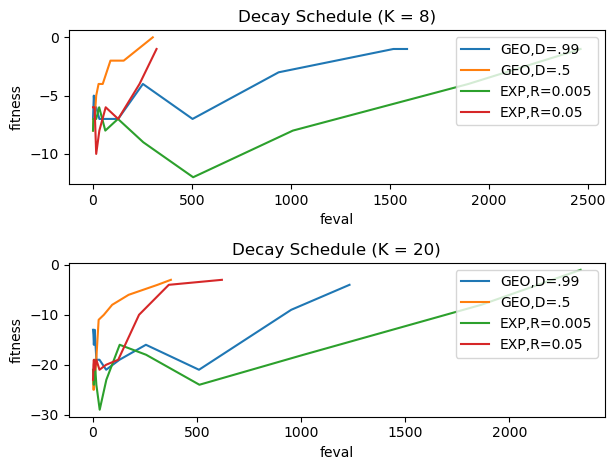

In [39]:
# decay fitness curves

labels = ["GEO,D=.99", "GEO,D=.5", "EXP,R=0.005",  "EXP,R=0.05"]

# temp fitness curves

fig, ax = plt.subplots(2,1)  


for i in range(len(temp_runs)):
    ax[0].plot(decay_runs[i][0][0]["FEvals"].values.tolist(),
            [-y for y in decay_runs[i][0][0]["Fitness"].values.tolist()],
            label = labels[i]
           )

for i in range(len(temp_runs)):
    ax[1].plot(decay_runs[i][3][0]["FEvals"].values.tolist(),
            [-y for y in decay_runs[i][3][0]["Fitness"].values.tolist()],
            label = labels[i]
           )

ax[0].legend(loc="upper right")
ax[0].set_xlabel("feval")
ax[0].set_ylabel("fitness")
ax[0].set_title("Decay Schedule (K = 8)")

ax[1].legend(loc="upper right")
ax[1].set_xlabel("feval")
ax[1].set_ylabel("fitness")
ax[1].set_title("Decay Schedule (K = 20)")

fig.tight_layout()

